In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import pandas as pd
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
to_drop = ['Id','Alley','PoolQC','Fence','MiscFeature','Electrical']

for k in to_drop:
    house_prices_df.drop([k], axis = 1, inplace = True)


cat_col_data = ['FireplaceQu','GarageType','GarageFinish','MasVnrType','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
          'GarageQual','GarageCond']

ncat_col_data = ['LotFrontage','GarageYrBlt','MasVnrArea']
for i in cat_col_data:
    house_prices_df[i] = house_prices_df[i].fillna(house_prices_df[i].mode()[0])
    
for j in ncat_col_data:
    house_prices_df[j] = house_prices_df[j].fillna(house_prices_df[j].mean())
    categorical_features=[feature for feature in house_prices_df.columns if house_prices_df[feature].dtype=='O']
for feature in categorical_features:
    labels_ordered=house_prices_df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    house_prices_df[feature]=house_prices_df[feature].map(labels_ordered)

Verilerinizi eğitim ve test kümelerine ayırın.

In [8]:
X = house_prices_df[['OverallQual','GrLivArea','Neighborhood','ExterQual']]
Y = house_prices_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.

In [10]:
X_train = sm.add_constant(X_train)
sonuclar = sm.OLS(y_train, X_train).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     996.5
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:19:21   Log-Likelihood:                -13944.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1163   BIC:                         2.792e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.939e+04   5313.812    -13.058      0.000   -7.98e+04    -5.9e+04
OverallQual   1.714e+04   1390.165     12.327      0.000    1.44e+04    1.99e+04
GrLivArea       53.0650      2.549     20.818      0.000      48.064      58.066
Neighborhood  3258.5394    234.700     13.884      0.000    2798.056    3719.023
ExterQual     1.813e+04   2930.778      6.186      0.000    1.24e+04    2.39e+04
==============================================================================
Omnibus:                      323.265   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7414.531
Skew:                           0.717   Prob(JB):                         0.00
Kurtosis:                      15.260   Cond. No.                     8.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared : 0.774 <br>
P-value uygun



Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.
 
Modelinizin performansı tatmin edici mi? Açıklayın.

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


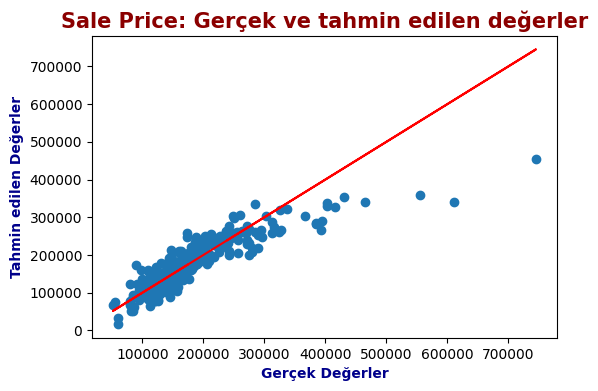

Ortalama Mutlak Hata (MAE)        : 26816.111111380204
Ortalama Kare Hata (MSE)          : 1746090898.576914
Kök Ortalama Kare Hata (RMSE)     : 41786.252506977864
Ortalama Mutlak Yüzde Hata (MAPE) : 14.831749610101975


In [11]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Sale Price: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Grafikte, modelimizin hedefin daha düşük değerlerini daha yüksek değerlerden daha iyi tahmin ettiğini görüyoruz. Görselleştirmeler kullanmak, modellerin performansını anlamamıza yardımcı olur. Ancak, modellerimizi değerlendirmek için daha doğru yollar bulmamız gerekiyor.

Yüzde 14 ortalama mutlak yüzde hata ile modelin performansı değerlendirilebilir.

Önceki model üzerinde iyileştirme:

In [16]:
house_prices_df['Overall_GrLiv'] = house_prices_df.OverallQual * house_prices_df.GrLivArea
house_prices_df['Exter_Neigh'] = house_prices_df.ExterQual * house_prices_df.Neighborhood
X = house_prices_df[['OverallQual','GrLivArea','Neighborhood','ExterQual','Overall_GrLiv','Exter_Neigh']]
Y = house_prices_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [17]:
X_train = sm.add_constant(X_train)
sonuclar = sm.OLS(y_train, X_train).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     803.8
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:29:28   Log-Likelihood:                -13855.
No. Observations:                1168   AIC:                         2.772e+04
Df Residuals:                    1161   BIC:                         2.776e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.478e+04   1.24e+04      5.236      0.000    4.05e+04     8.9e+04
OverallQual    5452.8006   2064.577      2.641      0.008    1402.082    9503.519
GrLivArea         3.3295      7.874      0.423      0.673     -12.120      18.779
Neighborhood   -942.6606    477.300     -1.975      0.049   -1879.128      -6.194
ExterQual     -3.293e+04   5240.438     -6.284      0.000   -4.32e+04   -2.27e+04
Overall_GrLiv     7.4593      1.093      6.822      0.000       5.314       9.605
Exter_Neigh    3247.7924    306.957     10.581      0.000    2645.541    3850.044
==============================================================================
Omnibus:                      252.375   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8130.685
Skew:                          -0.166   Prob(JB):                         0.00
Kurtosis:                      15.921   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

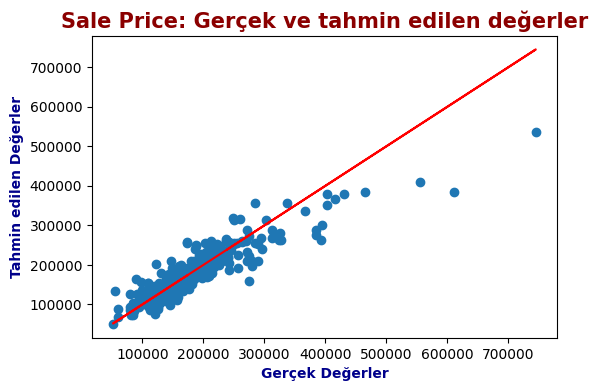

Ortalama Mutlak Hata (MAE)        : 25197.5453940226
Ortalama Kare Hata (MSE)          : 1421316012.210538
Kök Ortalama Kare Hata (RMSE)     : 37700.34498795121
Ortalama Mutlak Yüzde Hata (MAPE) : 13.917268492882517


In [18]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Sale Price: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

MAPE değerinde bir miktar düşme gözlendi ve R-squared değeri %80'e ulaştı.